# 퍼텐셜 함수와 고유벡터(고유함수) 동시 시각화

아래 셀은 **퍼텐셜 함수**와 **고유벡터(고유함수) 곡선**을 같은 그래프에 동시에 표시합니다.
외부 라이브러리 없이 동작하도록 작성했습니다.

SVG ready\n

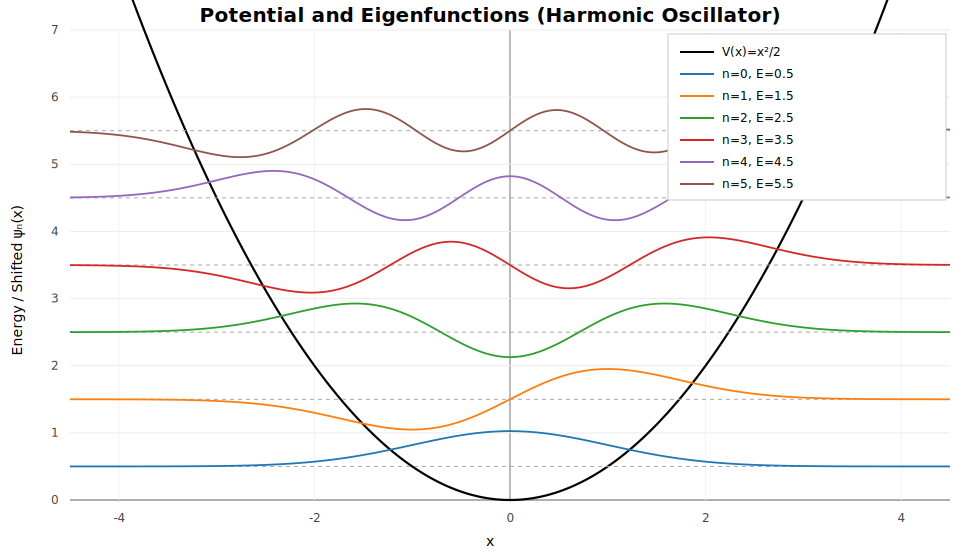

In [1]:
import math

# x grid
x_min, x_max = -4.5, 4.5
num_points = 700
x_values = [x_min + (x_max - x_min) * i / (num_points - 1) for i in range(num_points)]

# Harmonic oscillator potential and eigenfunctions (analytic, atomic units)
# V(x) = x^2 / 2, E_n = n + 1/2

def hermite_phys(n, x):
    if n == 0:
        return 1.0
    if n == 1:
        return 2.0 * x
    h_nm2 = 1.0
    h_nm1 = 2.0 * x
    for k in range(1, n):
        h_n = 2.0 * x * h_nm1 - 2.0 * k * h_nm2
        h_nm2, h_nm1 = h_nm1, h_n
    return h_nm1

# psi_n(x) = (1/sqrt(2^n n!)) * pi^(-1/4) * H_n(x) * exp(-x^2/2)
def psi(n, x):
    norm = 1.0 / math.sqrt((2 ** n) * math.factorial(n)) * (math.pi ** -0.25)
    return norm * hermite_phys(n, x) * math.exp(-0.5 * x * x)

V = [0.5 * x * x for x in x_values]
num_states = 6
E = [n + 0.5 for n in range(num_states)]
scale = 0.7
psi_shifted = [[E[n] + scale * psi(n, x) for x in x_values] for n in range(num_states)]

# SVG drawing helpers
width, height = 980, 560
margin_left, margin_right, margin_top, margin_bottom = 70, 30, 30, 60
plot_w = width - margin_left - margin_right
plot_h = height - margin_top - margin_bottom

y_min, y_max = 0.0, 7.0

def sx(x):
    return margin_left + (x - x_min) / (x_max - x_min) * plot_w

def sy(y):
    return margin_top + (y_max - y) / (y_max - y_min) * plot_h

def polyline(xs, ys):
    return " ".join(f"{sx(x):.2f},{sy(y):.2f}" for x, y in zip(xs, ys))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

parts = []
parts.append(f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}" viewBox="0 0 {width} {height}">')
parts.append('<rect x="0" y="0" width="100%" height="100%" fill="white"/>')

# Axes
parts.append(f'<line x1="{margin_left}" y1="{sy(0):.2f}" x2="{width-margin_right}" y2="{sy(0):.2f}" stroke="#333" stroke-width="1.4"/>')
parts.append(f'<line x1="{sx(0):.2f}" y1="{margin_top}" x2="{sx(0):.2f}" y2="{height-margin_bottom}" stroke="#333" stroke-width="1.2"/>')

# Grid and ticks
for y_tick in [0,1,2,3,4,5,6,7]:
    ypix = sy(y_tick)
    parts.append(f'<line x1="{margin_left}" y1="{ypix:.2f}" x2="{width-margin_right}" y2="{ypix:.2f}" stroke="#ececec" stroke-width="1"/>')
    parts.append(f'<text x="{margin_left-12}" y="{ypix+4:.2f}" text-anchor="end" font-size="12" fill="#444">{y_tick}</text>')
for x_tick in [-4,-2,0,2,4]:
    xpix = sx(x_tick)
    parts.append(f'<line x1="{xpix:.2f}" y1="{margin_top}" x2="{xpix:.2f}" y2="{height-margin_bottom}" stroke="#f2f2f2" stroke-width="1"/>')
    parts.append(f'<text x="{xpix:.2f}" y="{height-margin_bottom+22}" text-anchor="middle" font-size="12" fill="#444">{x_tick}</text>')

# Potential curve
parts.append(f'<polyline fill="none" stroke="black" stroke-width="2.2" points="{polyline(x_values, V)}"/>')

# Energy lines + shifted eigenfunctions
for n in range(num_states):
    yy = sy(E[n])
    parts.append(f'<line x1="{margin_left}" y1="{yy:.2f}" x2="{width-margin_right}" y2="{yy:.2f}" stroke="#a8a8a8" stroke-dasharray="4,4" stroke-width="1"/>')
    parts.append(f'<polyline fill="none" stroke="{colors[n]}" stroke-width="1.8" points="{polyline(x_values, psi_shifted[n])}"/>')

# Labels and legend
parts.append('<text x="490" y="22" text-anchor="middle" font-size="20" font-weight="600">Potential and Eigenfunctions (Harmonic Oscillator)</text>')
parts.append(f'<text x="{width/2:.1f}" y="{height-14}" text-anchor="middle" font-size="14">x</text>')
parts.append(f'<text x="22" y="{height/2:.1f}" transform="rotate(-90 22 {height/2:.1f})" text-anchor="middle" font-size="14">Energy / Shifted ψₙ(x)</text>')

legend_x, legend_y = width - 300, 52
parts.append(f'<rect x="{legend_x-12}" y="{legend_y-18}" width="278" height="166" fill="white" stroke="#ccc"/>')
parts.append(f'<line x1="{legend_x}" y1="{legend_y}" x2="{legend_x+34}" y2="{legend_y}" stroke="black" stroke-width="2"/>')
parts.append(f'<text x="{legend_x+42}" y="{legend_y+4}" font-size="12">V(x)=x²/2</text>')
for n in range(num_states):
    ly = legend_y + 22 + n*22
    parts.append(f'<line x1="{legend_x}" y1="{ly}" x2="{legend_x+34}" y2="{ly}" stroke="{colors[n]}" stroke-width="2"/>')
    parts.append(f'<text x="{legend_x+42}" y="{ly+4}" font-size="12">n={n}, E={E[n]:.1f}</text>')

parts.append('</svg>')
svg = "".join(parts)
print('SVG ready')

